In [33]:
# Extracting Labels
import os
import pandas as pd

def extract_labels(image_filename):
    try:
        basename = os.path.basename(image_filename)
        name, _ = os.path.splitext(basename)
        labels = name.split('_')
        return {
            'age': int(labels[0]),
            'gender': int(labels[1]),
            'race': int(labels[2]),
            'datetime': labels[3]
        }
    except Exception as e:
        print(f"Error extracting labels from {image_filename}: {e}")
        return None

def process_image_folder(folder_path):
    data = []
    for subdir, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith(".jpg"):
                file_path = os.path.join(subdir, file)
                labels = extract_labels(file_path)
                if labels:
                    labels['image_path'] = file_path
                    data.append(labels)
                else:
                    print(f"Skipping file due to label extraction error: {file_path}")
            else:
                print(f"Skipping non-image file: {file}")

    if data:
        df = pd.DataFrame(data)
    else:
        df = pd.DataFrame(columns=['age', 'gender', 'race', 'datetime', 'image_path'])
    return df

main_folder = "data" 
dataframe = process_image_folder(main_folder)

output_csv = 'demographic_features.csv'
dataframe.to_csv(output_csv, index=False)
print(f"Data has been processed and saved to {output_csv}")


Error extracting labels from data\part1\61_1_20170109142408075.jpg: list index out of range
Skipping file due to label extraction error: data\part1\61_1_20170109142408075.jpg
Error extracting labels from data\part1\61_3_20170109150557335.jpg: list index out of range
Skipping file due to label extraction error: data\part1\61_3_20170109150557335.jpg
Error extracting labels from data\part2\39_1_20170116174525125.jpg: list index out of range
Skipping file due to label extraction error: data\part2\39_1_20170116174525125.jpg
Error extracting labels from data\part2\53__0_20170116184028385.jpg: invalid literal for int() with base 10: ''
Skipping file due to label extraction error: data\part2\53__0_20170116184028385.jpg
Skipping non-image file: .DS_Store
Skipping non-image file: 44_1_4_20170116235150272.pg
Skipping non-image file: 55_0_0_20170116232725357jpg
Data has been processed and saved to demographic_features.csv


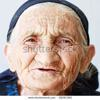

Age: 100, Gender: 1, Race: 0, DateTime: 20170110183726390


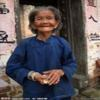

Age: 100, Gender: 1, Race: 2, DateTime: 20170105174847679


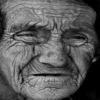

Age: 100, Gender: 1, Race: 2, DateTime: 20170110182836729


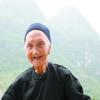

Age: 101, Gender: 1, Race: 2, DateTime: 20170105174739309


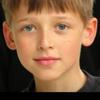

Age: 10, Gender: 0, Race: 0, DateTime: 20161220222308131


In [34]:
from IPython.display import Image, display
import pandas as pd

# Loading the CSV file
input_csv = 'demographic_features.csv'
df = pd.read_csv(input_csv)

def display_images_with_dataframe(df):
    for i, row in df.iterrows():
        display(Image(filename=row['image_path'], width=30, height=30))
        print(f"Age: {row['age']}, Gender: {row['gender']}, Race: {row['race']}, DateTime: {row['datetime']}")

display_images_with_dataframe(df.head())


In [35]:
df.head()

,age,gender,race,datetime,image_path
0,100,1,0,20170110183726390,data\part1\100_1_0_20170110183726390.jpg
1,100,1,2,20170105174847679,data\part1\100_1_2_20170105174847679.jpg
2,100,1,2,20170110182836729,data\part1\100_1_2_20170110182836729.jpg
3,101,1,2,20170105174739309,data\part1\101_1_2_20170105174739309.jpg
4,10,0,0,20161220222308131,data\part1\10_0_0_20161220222308131.jpg


In [36]:
df.shape

(24102, 5)

## Data Analysis

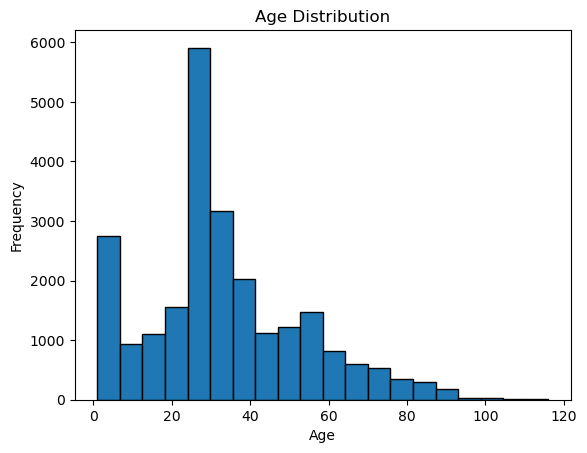

In [38]:
# Ploting age distribution
import matplotlib.pyplot as plt
import seaborn as sns
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

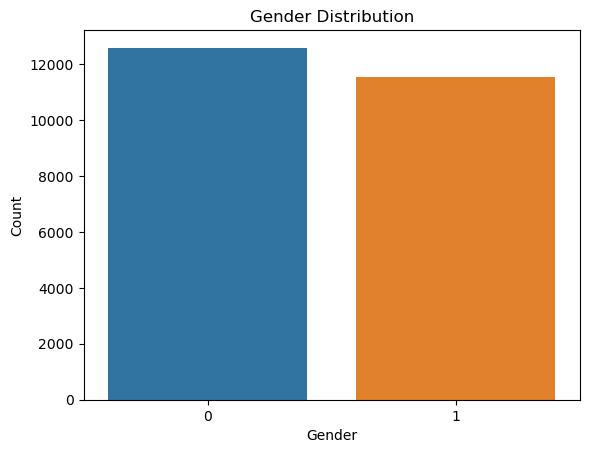

In [39]:
# Gender Distribution
sns.countplot(x='gender', data=df)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()


C:\Users\miraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


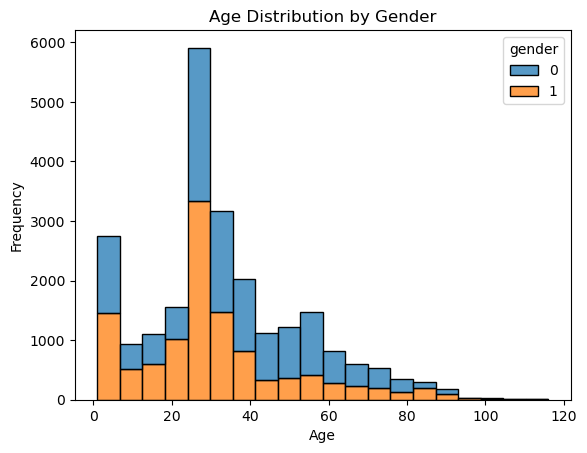

In [40]:
sns.histplot(df, x='age', hue='gender', multiple='stack', bins=20)
plt.title('Age Distribution by Gender')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


In [41]:
import warnings


C:\Users\miraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


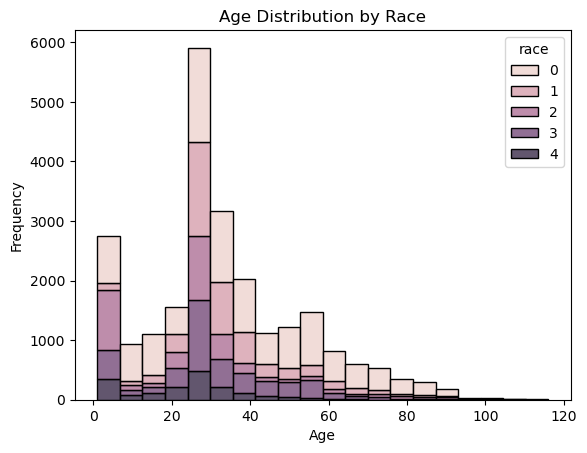

In [42]:
import warnings
# Age Distribution by Race
with warnings.catch_warnings():
    warnings.simplefilter('ignore', FutureWarning)
sns.histplot(df, x='age', hue='race', multiple='stack', bins=20)
plt.title('Age Distribution by Race')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


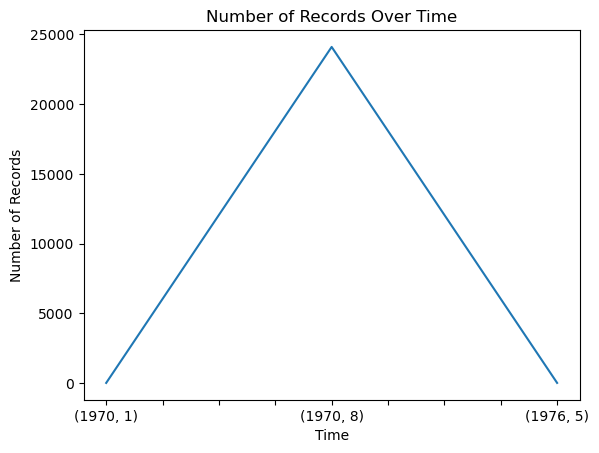

In [43]:
# Temporal Analysis
df['datetime'] = pd.to_datetime(df['datetime'])
df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month

df.groupby(['year', 'month']).size().plot(kind='line')
plt.title('Number of Records Over Time')
plt.xlabel('Time')
plt.ylabel('Number of Records')
plt.show()


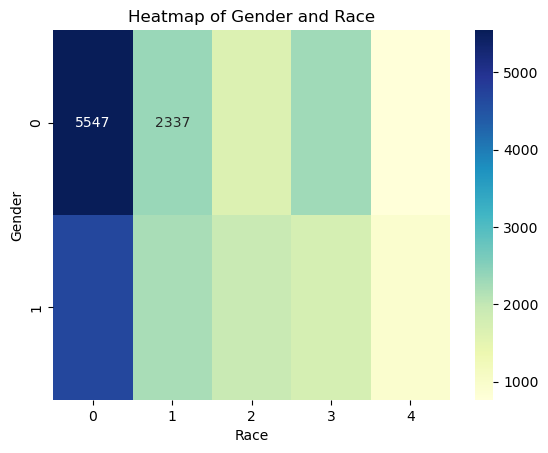

In [44]:
# Heatmap of Gender and Race
gender_race_pivot = df.pivot_table(index='gender', columns='race', aggfunc='size', fill_value=0)
sns.heatmap(gender_race_pivot, annot=True, fmt='d', cmap='YlGnBu')
plt.title('Heatmap of Gender and Race')
plt.xlabel('Race')
plt.ylabel('Gender')
plt.show()


C:\Users\miraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\miraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\miraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\miraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

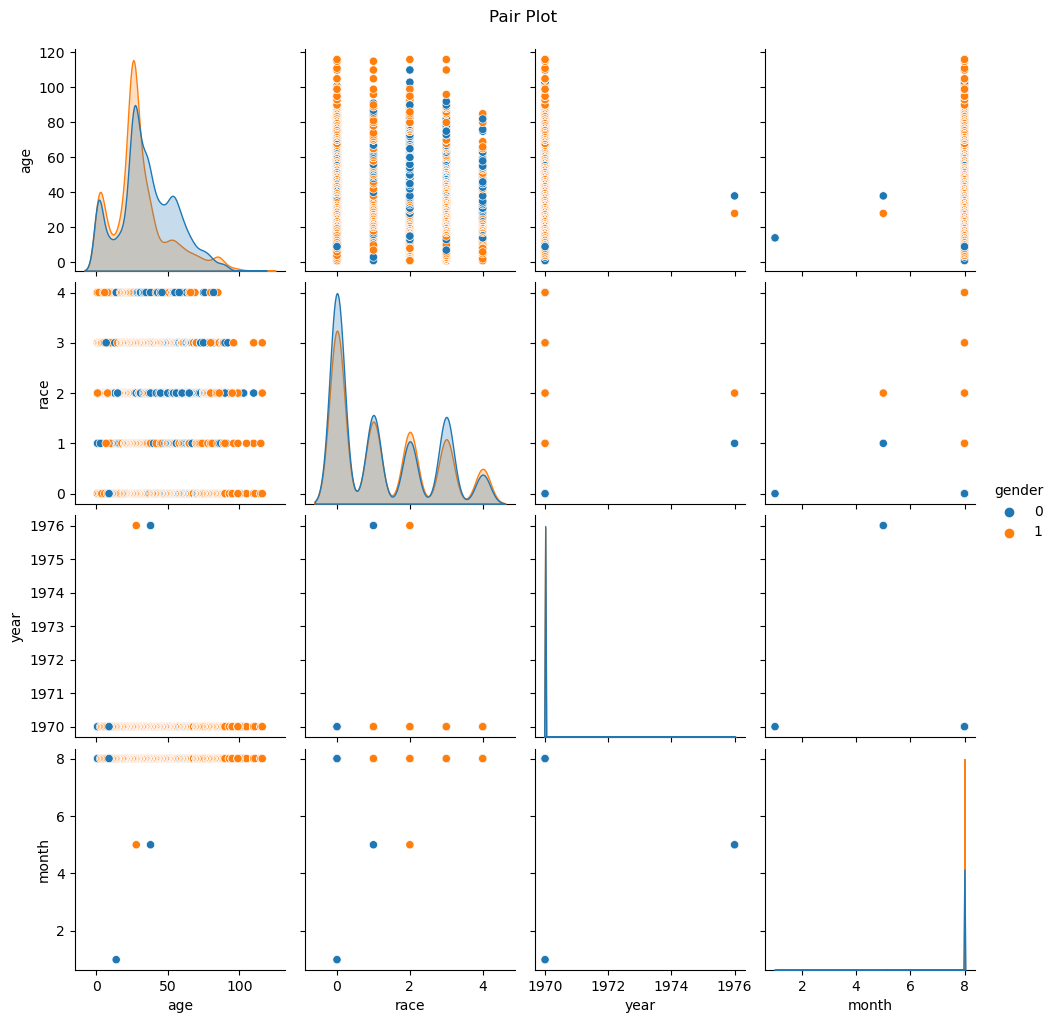

In [45]:
# Pair Plot
sns.pairplot(df, hue='gender', diag_kind='kde')
plt.suptitle('Pair Plot', y=1.02)
plt.show()


C:\Users\miraj\AppData\Local\Temp\ipykernel_22896\2007011407.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_gender_race_counts = df.groupby(['gender', 'race', age_ranges])['age'].count().unstack().fillna(0)


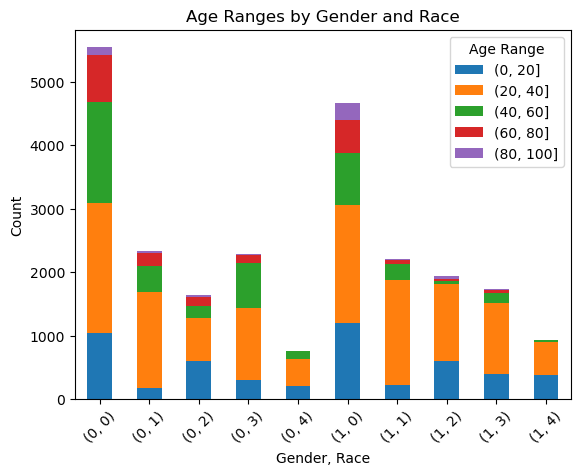

In [46]:
# Clustered Bar Chart of Age Ranges by Gender and Race
age_ranges = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100])
age_gender_race_counts = df.groupby(['gender', 'race', age_ranges])['age'].count().unstack().fillna(0)

age_gender_race_counts.plot(kind='bar', stacked=True)
plt.title('Age Ranges by Gender and Race')
plt.xlabel('Gender, Race')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Age Range')
plt.show()


C:\Users\miraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\miraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\miraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\miraj\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

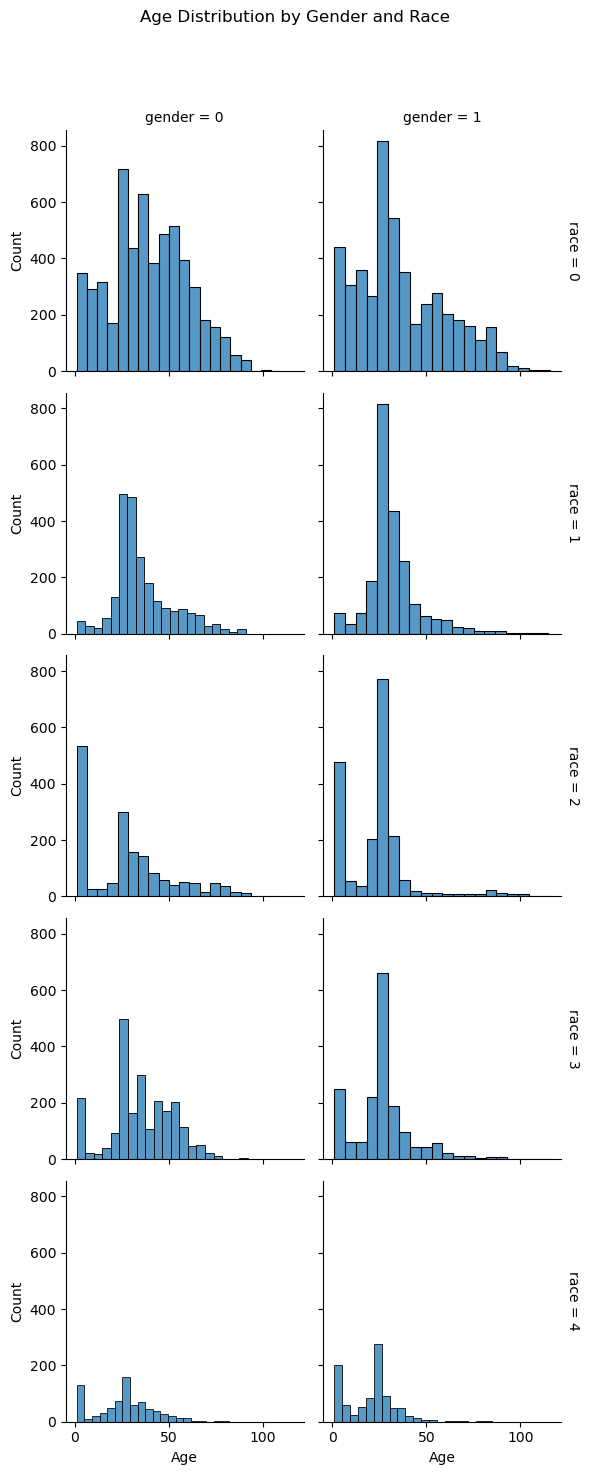

In [47]:
# Facet Grid for Age Distribution by Gender and Race
g = sns.FacetGrid(df, col='gender', row='race', margin_titles=True)
g.map(sns.histplot, 'age', bins=20)
g.set_axis_labels('Age', 'Count')
plt.subplots_adjust(top=0.9)
g.fig.suptitle('Age Distribution by Gender and Race')
plt.show()


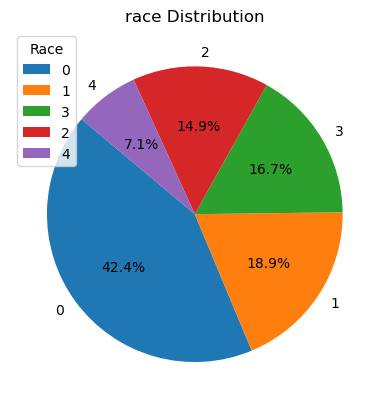

In [48]:
# Ploting Race Destribution
gender_counts = df['race'].value_counts()
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('race Distribution')
plt.legend(title='Race')
plt.show()

In [49]:
# # Ploting Colors of Images
# from colorthief import ColorThief
# from PIL import Image
# import concurrent.futures
# from collections import Counter

# # Function to get the dominant color
# def get_dominant_color(image_path):
#     try:
#         color_thief = ColorThief(image_path)
#         dominant_color = color_thief.get_color(quality=1)
#         return dominant_color
#     except Exception as e:
#         print(f"Error processing {image_path}: {e}")
#         return (0, 0, 0) 
        
# sampled_df = df.sample(100)
# def process_images(df):
#     dominant_colors = []
#     with concurrent.futures.ThreadPoolExecutor(max_workers=10) as executor:
#         futures = [executor.submit(get_dominant_color, row['image_path']) for idx, row in df.iterrows()]
#         for future in concurrent.futures.as_completed(futures):
#             dominant_colors.append(future.result())
#     return dominant_colors
    
# sampled_df.loc[:, 'dominant_color'] = process_images(sampled_df)

# def rgb_to_hex(rgb):
#     return '#%02x%02x%02x' % rgb

# sampled_df.loc[:, 'dominant_color_hex'] = sampled_df['dominant_color'].apply(rgb_to_hex)

# races = sampled_df['race'].unique()
# color_data = {}

# for race in races:
#     race_df = sampled_df[sampled_df['race'] == race]
#     color_counts = Counter(race_df['dominant_color_hex'])
#     color_data[race] = color_counts

# colors = list(set(sampled_df['dominant_color_hex']))
# data = {color: [color_data[race].get(color, 0) for race in races] for color in colors}
# color_df = pd.DataFrame(data, index=races)

# color_df.plot(kind='bar', stacked=True, color=colors)
# plt.title('Dominant Color Distribution by Race')
# plt.xlabel('Race')
# plt.ylabel('Frequency')
# plt.legend(title='Color', bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xticks(rotation=45)
# plt.show()